In [1]:
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# パラメータの更新

## SGD

### SGDとは

**確率的勾配降下法**（stochastic gradient descent）
1. パラメータの**勾配**（微分）を計算
2. 勾配方向にパラメータを更新する操作を繰り返す
3. 徐々に最適なパラメータへ近づける

$$\mathrm W\leftarrow \mathrm W-\eta \dfrac{\partial L}{\partial \mathrm W}$$

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # 学習率
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
def opt_net(optimizer):
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
    optimizer = optimizer
    
    iters_num = 10000
    train_size = x_train.shape[0]
    batch_size = 100

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)

    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = network.gradient(x_batch, t_batch)
        params = network.params         #注目
        optimizer.update(params, grads) #注目

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

    print("Done")

In [4]:
opt_net(SGD())

train acc, test acc | 0.1337, 0.1324
train acc, test acc | 0.6239166666666667, 0.6325
train acc, test acc | 0.7926, 0.7994
train acc, test acc | 0.8436333333333333, 0.8488
train acc, test acc | 0.8702833333333333, 0.8763
train acc, test acc | 0.8849666666666667, 0.8891
train acc, test acc | 0.8924333333333333, 0.8951
train acc, test acc | 0.8970333333333333, 0.8998
train acc, test acc | 0.9012166666666667, 0.9038
train acc, test acc | 0.9039333333333334, 0.906
train acc, test acc | 0.9066, 0.9106
train acc, test acc | 0.90935, 0.9138
train acc, test acc | 0.9110666666666667, 0.9136
train acc, test acc | 0.9133666666666667, 0.9157
train acc, test acc | 0.9150333333333334, 0.9184
train acc, test acc | 0.9168166666666666, 0.9193
train acc, test acc | 0.9185666666666666, 0.9208
Done


ニューラルネットワークのパラメータ更新ができる。

### 非効率的な探索

$$f\left( x,y\right) =\dfrac{1}{20}x^{2}+y^{2}$$

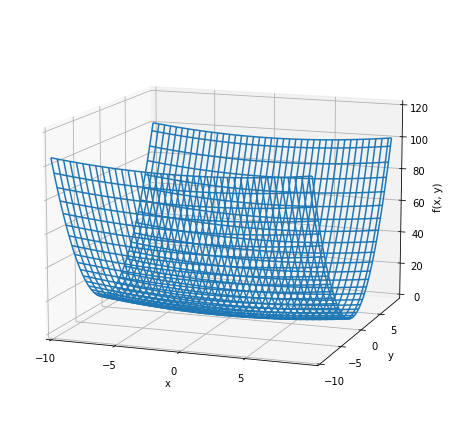

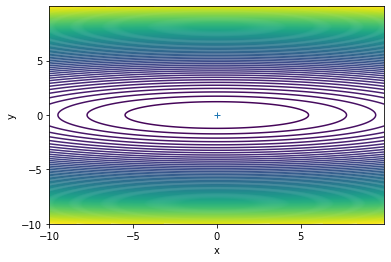

In [5]:
#グラフ
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)

X = np.arange(-10.0, 10.0, 0.25)
Y = np.arange(-10.0, 10.0, 0.25)

X, Y = np.meshgrid(X, Y)
Z = 1 / 20 * X ** 2 + Y ** 2

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 120)

plt.xticks(np.arange(-10, 10, 5))
plt.yticks(np.arange(-10, 10, 5))

ax.view_init(12, -70)
ax.plot_wireframe(X, Y, Z)
plt.show()

#等高線
x = np.arange(-10, 10, 0.01) # x軸
y = np.arange(-10, 10, 0.01) # y軸
 
X, Y = np.meshgrid(x, y)
Z = 1/20 * X**2 + Y**2

plt.plot(0, 0, '+') # 最小値の点

plt.xlabel("x")
plt.ylabel("y")

plt.xticks(np.arange(-10, 10, 5))
plt.yticks(np.arange(-10, 10, 5))

cont = plt.contour(X,Y,Z, levels=75)
plt.show()

上は、関数の形状が等方的でない（伸びた形）のものの例

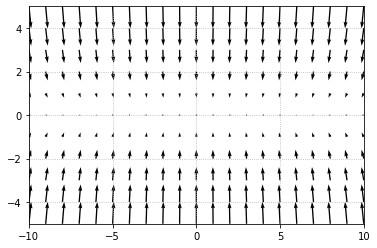

In [6]:
x1 = np.arange(-10,11,1)
y1 = np.arange(-5,6,1)

def f(x,y):
    return (x**2)/20 + y**2

def df(x, y):
    dx = x / 10.0
    dy = 2.0 * y
    return dx, dy

xx,yy = np.meshgrid(x1, y1) #始点
diffx, diffy = df(xx, yy)

diffX = -diffx
diffY = -diffy

plt.xticks([-10, -5, 0, 5, 10])
plt.xlim(-10,10)
plt.ylim(-5, 5)
plt.grid(linestyle='dotted')

plt.quiver(xx, yy, diffX, diffY) #(始点x座標, 始点y座標, 変位x成分, 変位y成分)
plt.show()

勾配はy軸方向は大きく、x軸方向は小さい。また、ほとんどの場所で最小値$(0, 0)$の方向を指していない。

In [7]:
def opt_path(optimizer, lr):
    
    # 等高線用の値
    x = np.arange(-10, 10, 0.01) # x軸の値
    y = np.arange(-5, 5, 0.01) # y軸の値
    X, Y = np.meshgrid(x, y) # 格子状の点に変換
    Z = f(X, Y)

    # パラメータの初期値を指定
    params = {}
    params['x'] = -7.0
    params['y'] = 2.0

    # 勾配の初期値を指定
    grads = {}
    grads['x'] = 0
    grads['y'] = 0

    # インスタンスを作成
    optimizer = optimizer(lr=lr)

    # 試行回数を指定
    iter_num = 30

    # 更新値の記録用リストを初期化
    x_history = []
    y_history = []

    # 初期値を保存
    x_history.append(params['x'])
    y_history.append(params['y'])

    # 関数の最小値を探索
    for _ in range(iter_num):

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

        x_history.append(params['x'])
        y_history.append(params['y'])

    # 作図
    plt.figure(dpi=300)
    plt.plot(x_history, y_history,'o-',markeredgecolor='black',color='red',markersize=4,lw=0.75)
    plt.contour(X, Y, Z, levels=list(range(8)), colors='blue',linewidths=0.5)

    plt.plot(0, 0, '+')

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    plt.xticks([-10,-5,0,5,10])
    plt.yticks([-10,-5,0,5,10])
    plt.minorticks_on()
    plt.xlabel("x")
    plt.ylabel("y")
    
    title = optimizer.__class__.__name__
    plt.title(title, fontsize=10)
    plt.show()

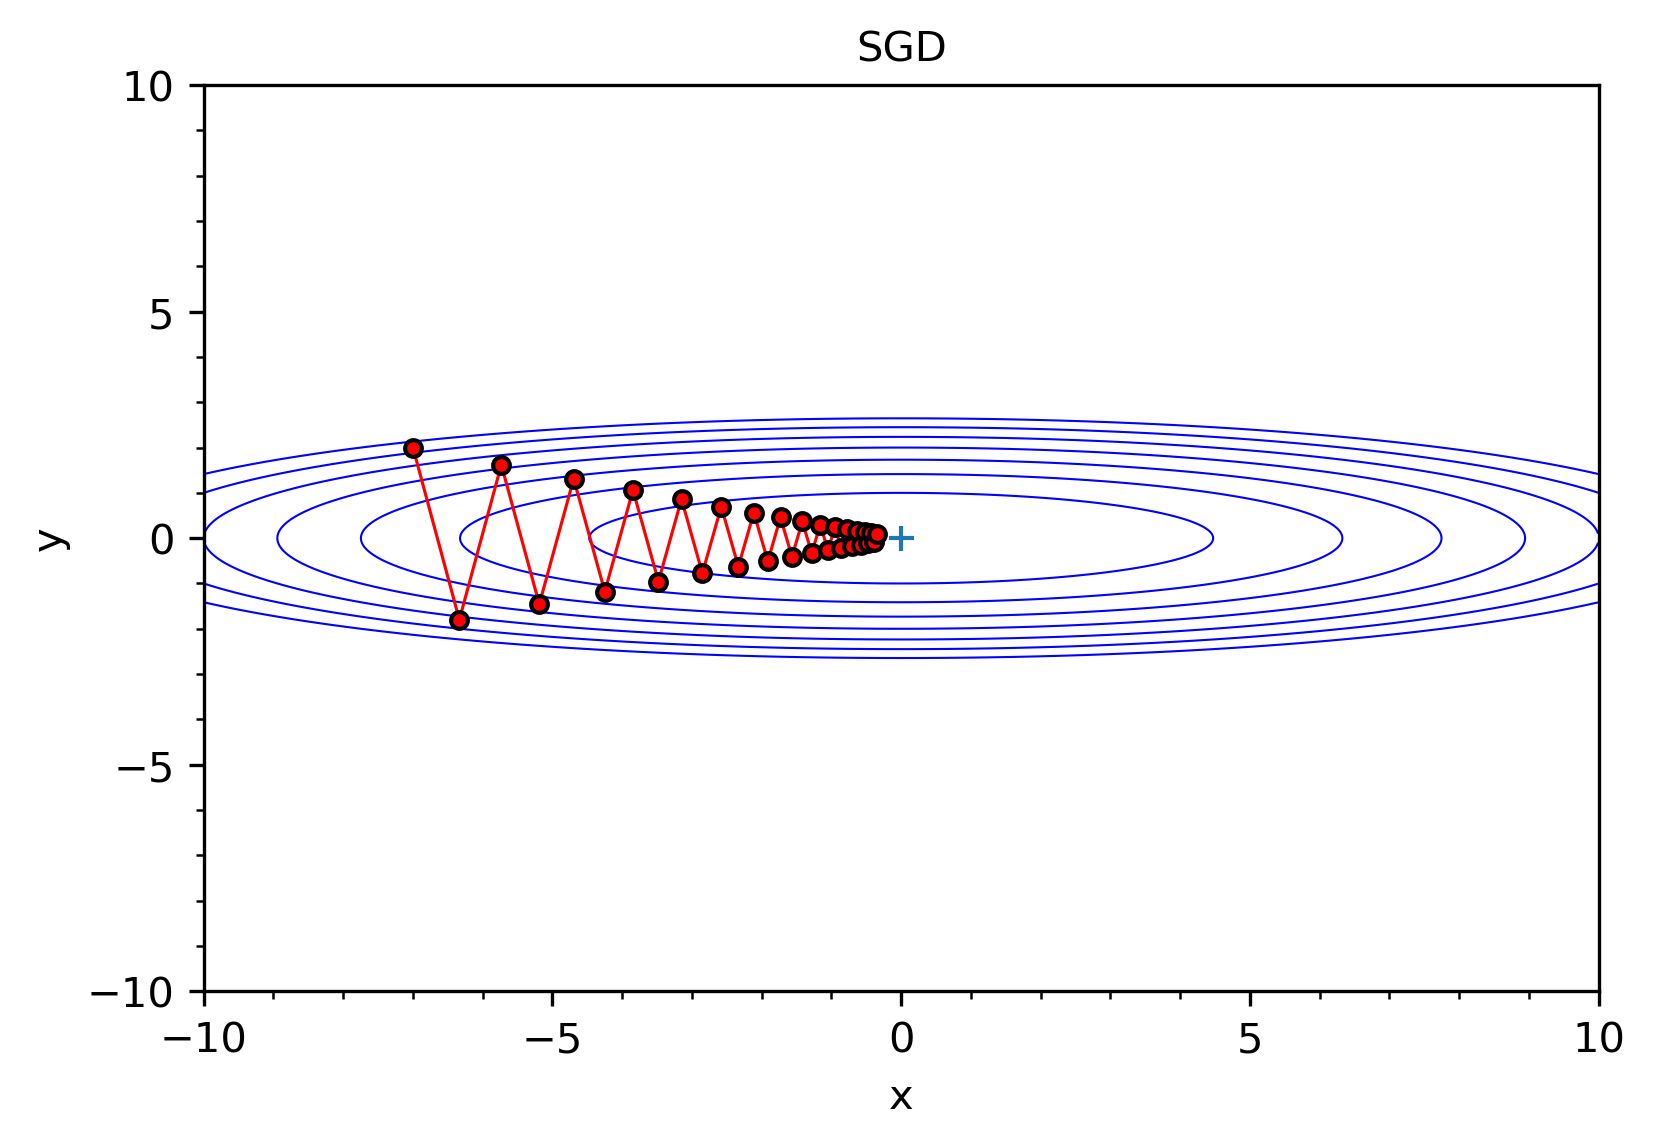

In [8]:
opt_path(SGD, 0.95)

SGDによって求まった勾配方向が実際の最小値を表していないため、ジグザクな動きをしている（非効率的）。<br><br>
SGDの欠点は、関数の形状が等方的でないと（伸びた形の関数だと）勾配方向と実際の最小値の方向とのズレが大きくなり、非効率的な方法で探索してしまうということである。

## Momentum

SGDの、常に一定な更新度合いと異なり、Momentum（和訳:運動量）は、<br>
$\mathrm v$を速度、$\alpha \mathrm v$を摩擦力・空気抵抗に例えると、地面を転がるボールが徐々に減速するイメージ。

$$\mathrm v\leftarrow \alpha \mathrm v-\eta \dfrac{\partial L}{\partial \mathrm W}$$

$$\mathrm W \leftarrow \mathrm W + \mathrm v$$

In [9]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None: # 初回のみ
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [10]:
opt_net(Momentum())

train acc, test acc | 0.08786666666666666, 0.0871
train acc, test acc | 0.90345, 0.9057
train acc, test acc | 0.9229, 0.925
train acc, test acc | 0.9365833333333333, 0.9368
train acc, test acc | 0.9450166666666666, 0.9427
train acc, test acc | 0.9517166666666667, 0.95
train acc, test acc | 0.9574333333333334, 0.954
train acc, test acc | 0.9610166666666666, 0.9586
train acc, test acc | 0.9641833333333333, 0.9607
train acc, test acc | 0.9673666666666667, 0.9622
train acc, test acc | 0.96985, 0.9637
train acc, test acc | 0.9704166666666667, 0.9654
train acc, test acc | 0.9738, 0.9663
train acc, test acc | 0.9740666666666666, 0.9671
train acc, test acc | 0.9762166666666666, 0.9688
train acc, test acc | 0.9777333333333333, 0.9693
train acc, test acc | 0.9789666666666667, 0.9701
Done


ニューラルネットワークのパラメータ更新ができる。

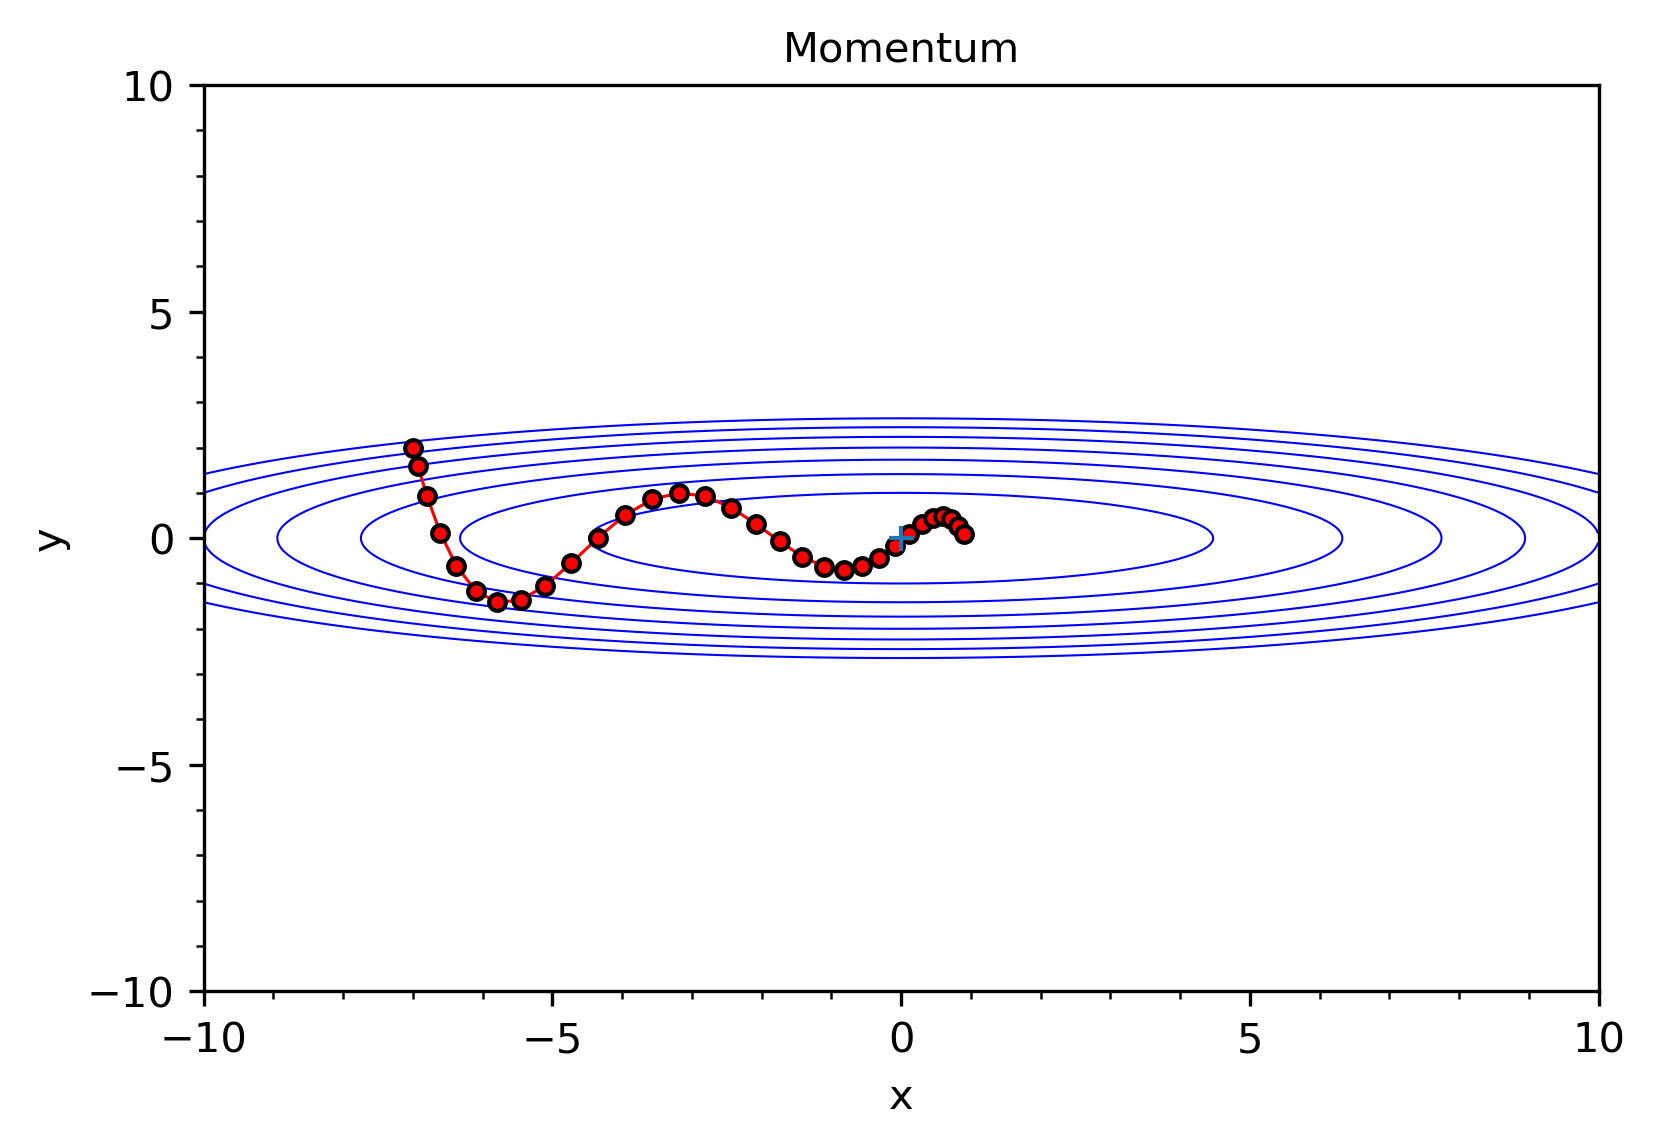

In [11]:
opt_path(Momentum, 0.1)

- ボールが滑らかに転がるような動き
- x軸方向に受ける力こそ小さけれ、常に同じ向きの力を受けるため一定して加速できる
- y軸方向に受ける力こそ大きけれ、正と負の向きの力を交互に受けるため速度が安定しない

SGDに比べて、x軸方向へ速く近づくことができ、ジグザグの動きを軽減できている（SGDより効率が良い）。

## AdaGrad

学習係数 $\eta$ が大きすぎると発散してしまい、小さすぎると学習に時間がかかりすぎてしまう。<br>
**学習係数の減衰**（learning rate decay）という方法では、最初は”大きく”学習し、次第に”小さく”学習する。<br><br>
ニューラルネットワークの学習にはよく使われる手法である。<br><br>
AdaGradでは、パラメータの要素ごとに適応的に学習係数を調整しながら学習を進める。

$$\mathrm h\leftarrow \mathrm h+\dfrac{\partial L}{\partial \mathrm W}\odot \dfrac{\partial L}{\partial \mathrm W}$$

$$\mathrm W\leftarrow \mathrm W-\eta \dfrac{1}{\sqrt{\mathrm h}}\dfrac{\partial L}{\partial \mathrm W}$$
$\odot$ は、行列の要素ごとの掛け算を意味する。

In [12]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None # 過去の勾配の二乗和
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

`1e-7`の小さい値を乗算しているのは、`self.h[key]`の中に`0`があった場合、0で除算するのを防ぐため。<br>
ここでは値を固定しているが、多くのディープラーニングのフレームワークではパラメータとして設定できる。

In [13]:
opt_net(AdaGrad())

train acc, test acc | 0.15848333333333334, 0.1625
train acc, test acc | 0.91455, 0.9175
train acc, test acc | 0.9247833333333333, 0.9252
train acc, test acc | 0.9298833333333333, 0.9306
train acc, test acc | 0.9337333333333333, 0.9331
train acc, test acc | 0.9376833333333333, 0.9374
train acc, test acc | 0.94185, 0.9401
train acc, test acc | 0.94455, 0.9421
train acc, test acc | 0.94595, 0.9447
train acc, test acc | 0.9485333333333333, 0.9466
train acc, test acc | 0.9496666666666667, 0.9489
train acc, test acc | 0.9515, 0.9496
train acc, test acc | 0.9522666666666667, 0.9509
train acc, test acc | 0.9537, 0.9516
train acc, test acc | 0.9545666666666667, 0.9514
train acc, test acc | 0.9561666666666667, 0.9528
train acc, test acc | 0.9567, 0.9532
Done


ニューラルネットワークのパラメータ更新ができる。

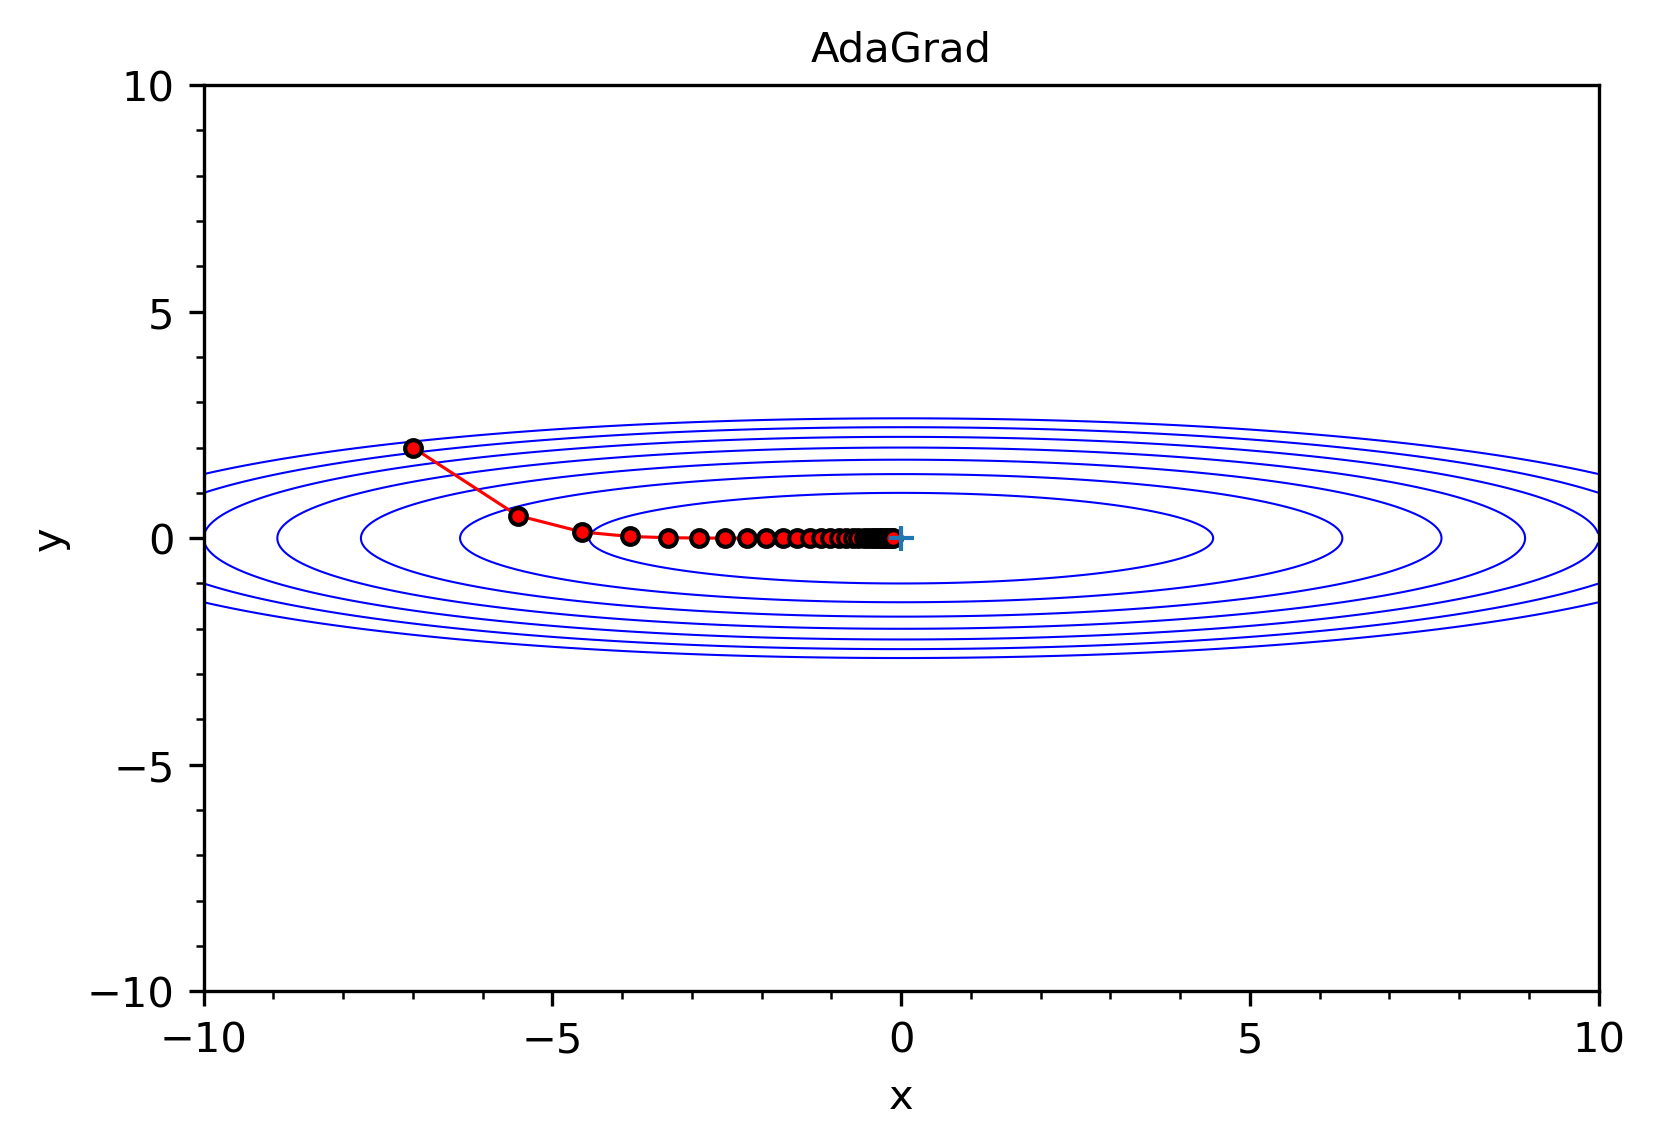

In [14]:
opt_path(AdaGrad, 1.5)

y軸方向の勾配が大きいため最初は大きく動くが、その分勾配のステップが小さくなるように調整されている。<br>
y軸方向の更新度合いが次第に弱められていき、ジグザグの動きが軽減されている。

### RMSProp

AdaGradは、過去の勾配を二乗和として全て記録するため、次第に更新度合いは小さくなり、やがて0になる。<br>
そのため、そのうちパラメータがが全く更新されなくなる。<br><br>
この問題の改善手法に、RMSPropがある。<br>
これは、過去の勾配の情報を徐々に忘れ、新しい勾配の情報をより大きく反映させるものである。

$$\mathrm h\leftarrow \beta \, \mathrm h+\left (1-\beta\right) \dfrac{\partial L}{\partial \mathrm W}\odot \dfrac{\partial L}{\partial \mathrm W}$$

$$\mathrm W\leftarrow \mathrm W-\eta \dfrac{1}{\sqrt{\mathrm h}}\dfrac{\partial L}{\partial \mathrm W}$$

In [15]:
class RMSProp:
    def __init__(self, lr=0.01, decay_rate = 0.9):
        self.lr = lr
        self.decay_rate = decay_rate # 減衰率
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate # 式(1)の前の項
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key] # 式(1)の後の項
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

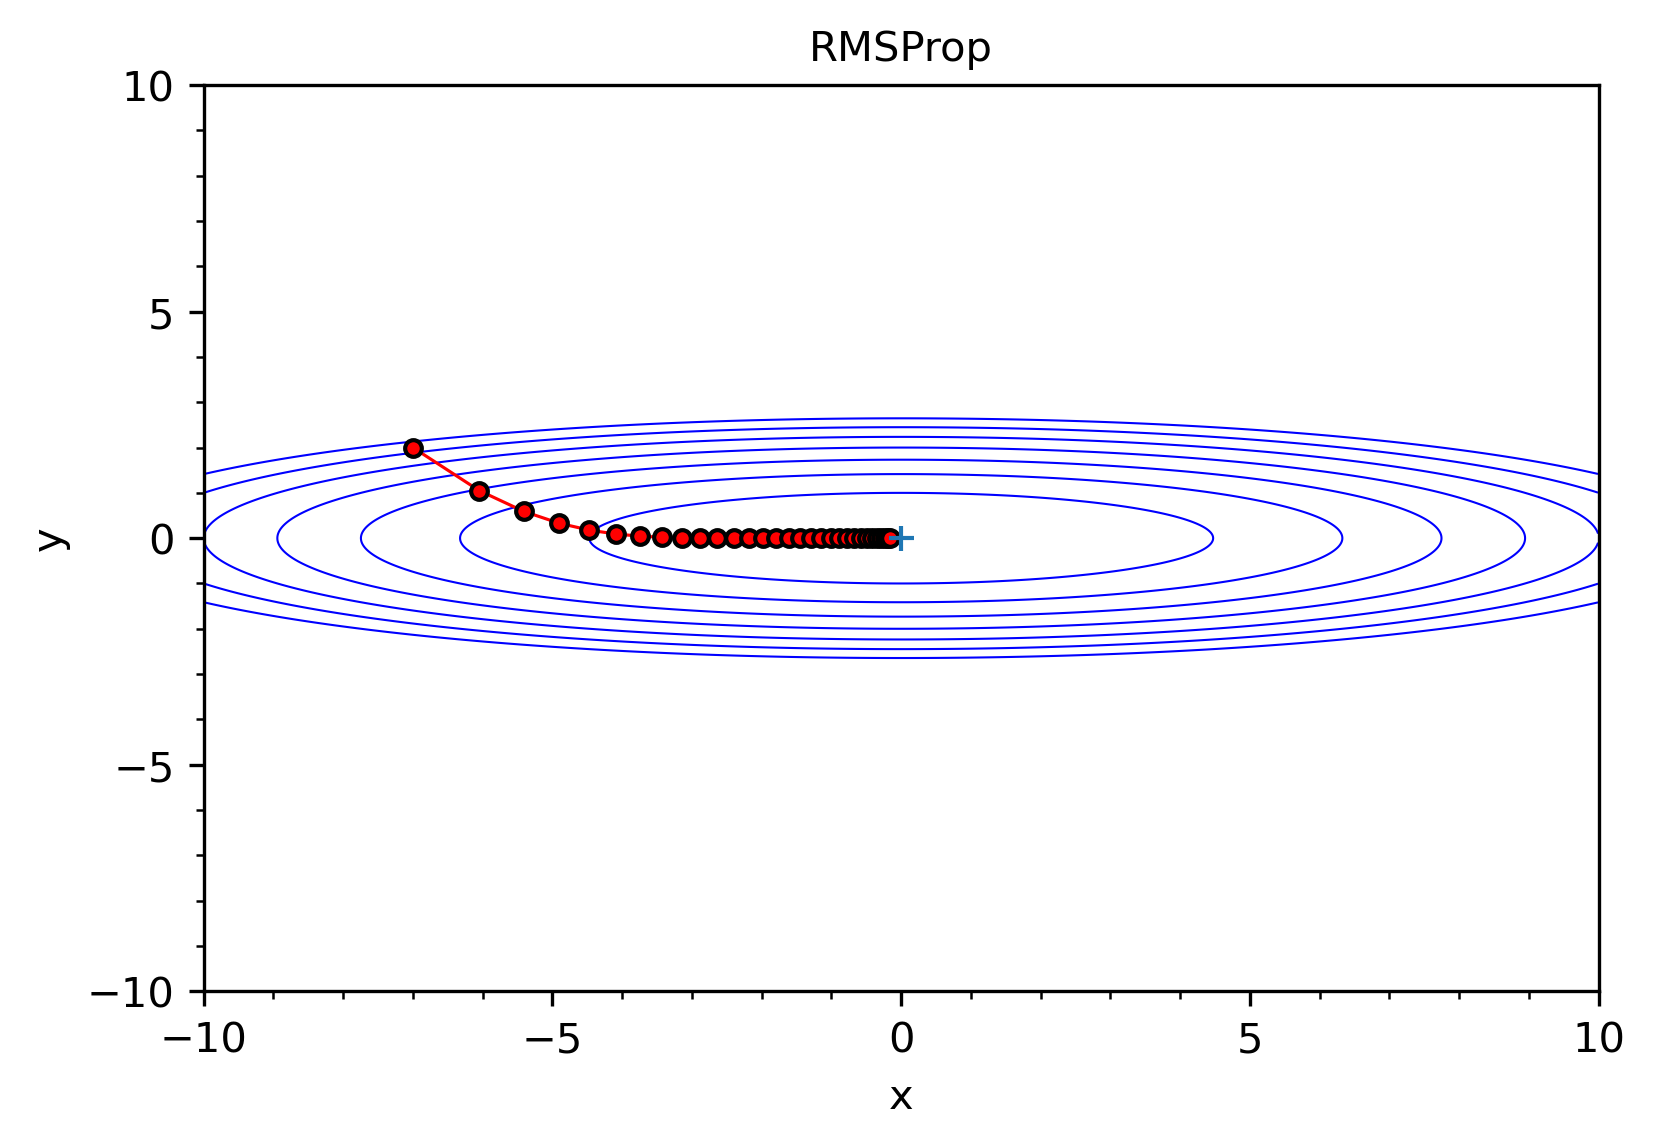

In [16]:
opt_path(RMSProp, 0.3)

## Adam

Adamは、Momentum（）とAdaGrad（）の融合をベースとしたイメージ。

In [17]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

In [18]:
opt_net(Adam())

train acc, test acc | 0.21971666666666667, 0.2192
train acc, test acc | 0.9181333333333334, 0.9205
train acc, test acc | 0.9346666666666666, 0.9327
train acc, test acc | 0.9479, 0.9466
train acc, test acc | 0.95465, 0.9512
train acc, test acc | 0.9601, 0.958
train acc, test acc | 0.9645833333333333, 0.9609
train acc, test acc | 0.9699333333333333, 0.9634
train acc, test acc | 0.9723, 0.9658
train acc, test acc | 0.9751, 0.9671
train acc, test acc | 0.9777666666666667, 0.9681
train acc, test acc | 0.9781166666666666, 0.9683
train acc, test acc | 0.9812333333333333, 0.9707
train acc, test acc | 0.98295, 0.9707
train acc, test acc | 0.9838166666666667, 0.9709
train acc, test acc | 0.9858166666666667, 0.9714
train acc, test acc | 0.9876666666666667, 0.9719
Done


ニューラルネットワークのパラメータ更新ができる。

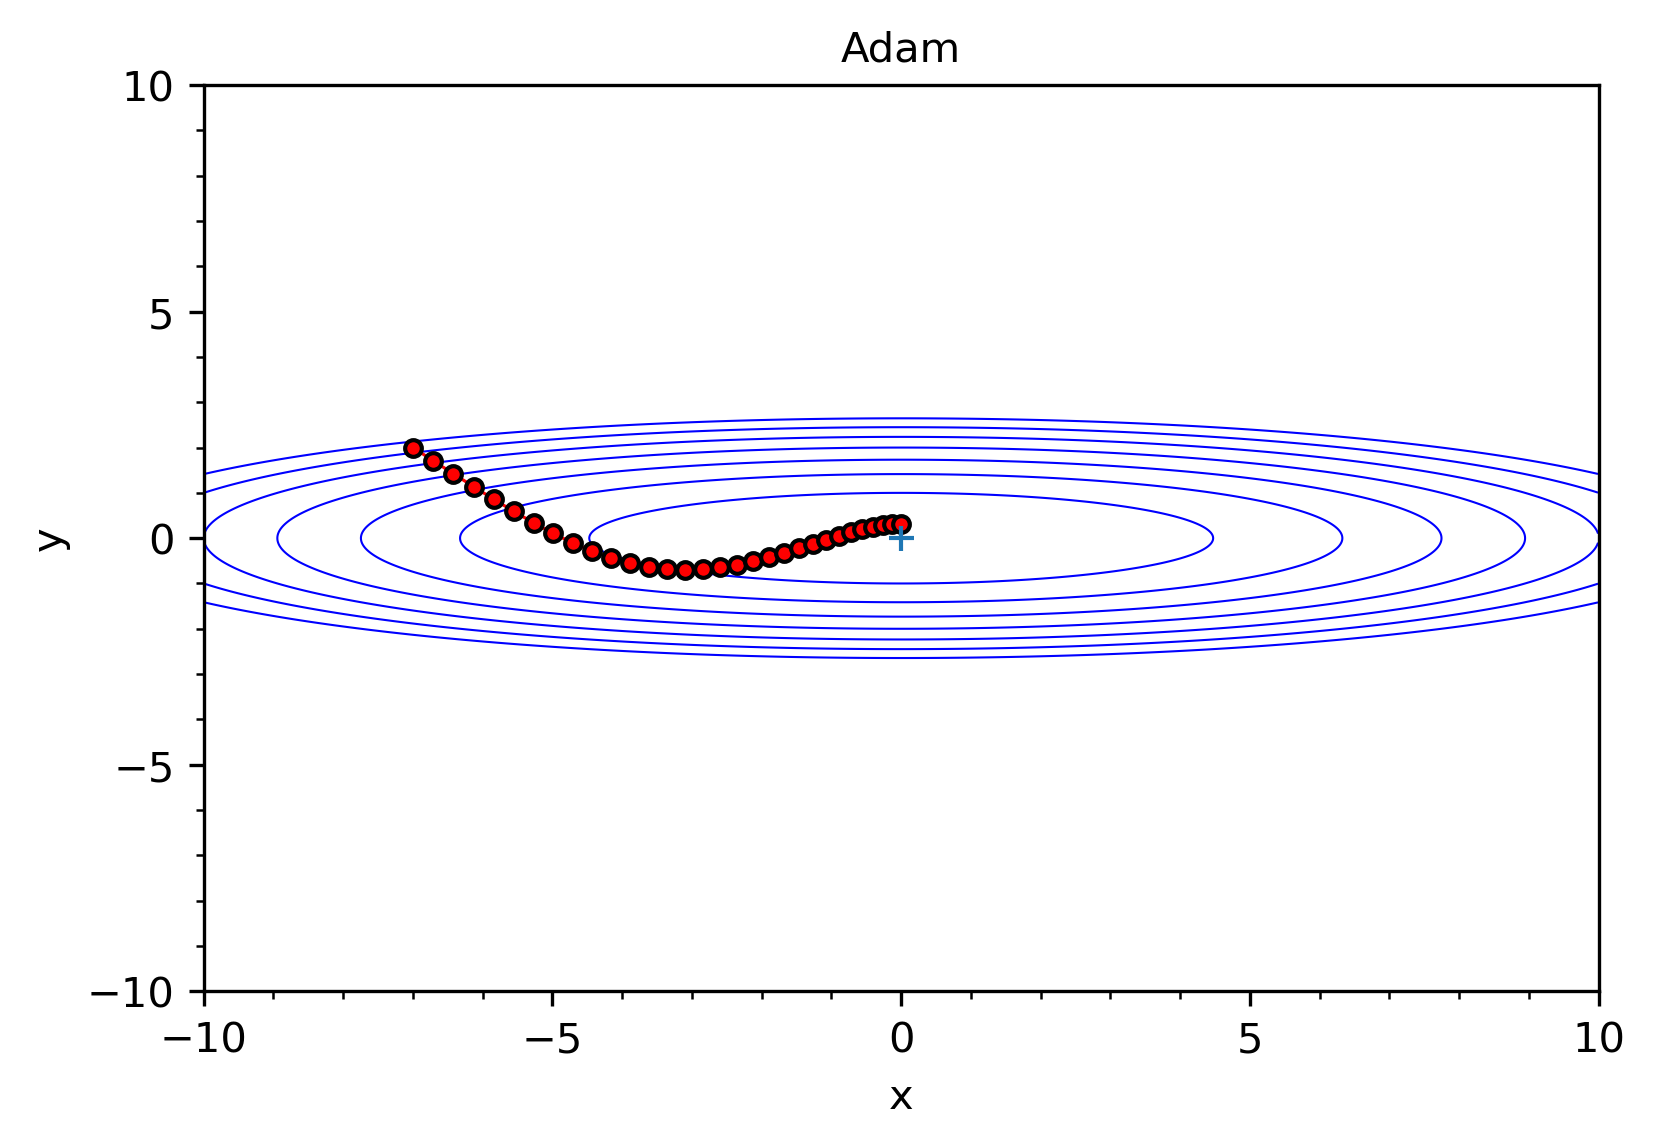

In [19]:
opt_path(Adam, 0.29)

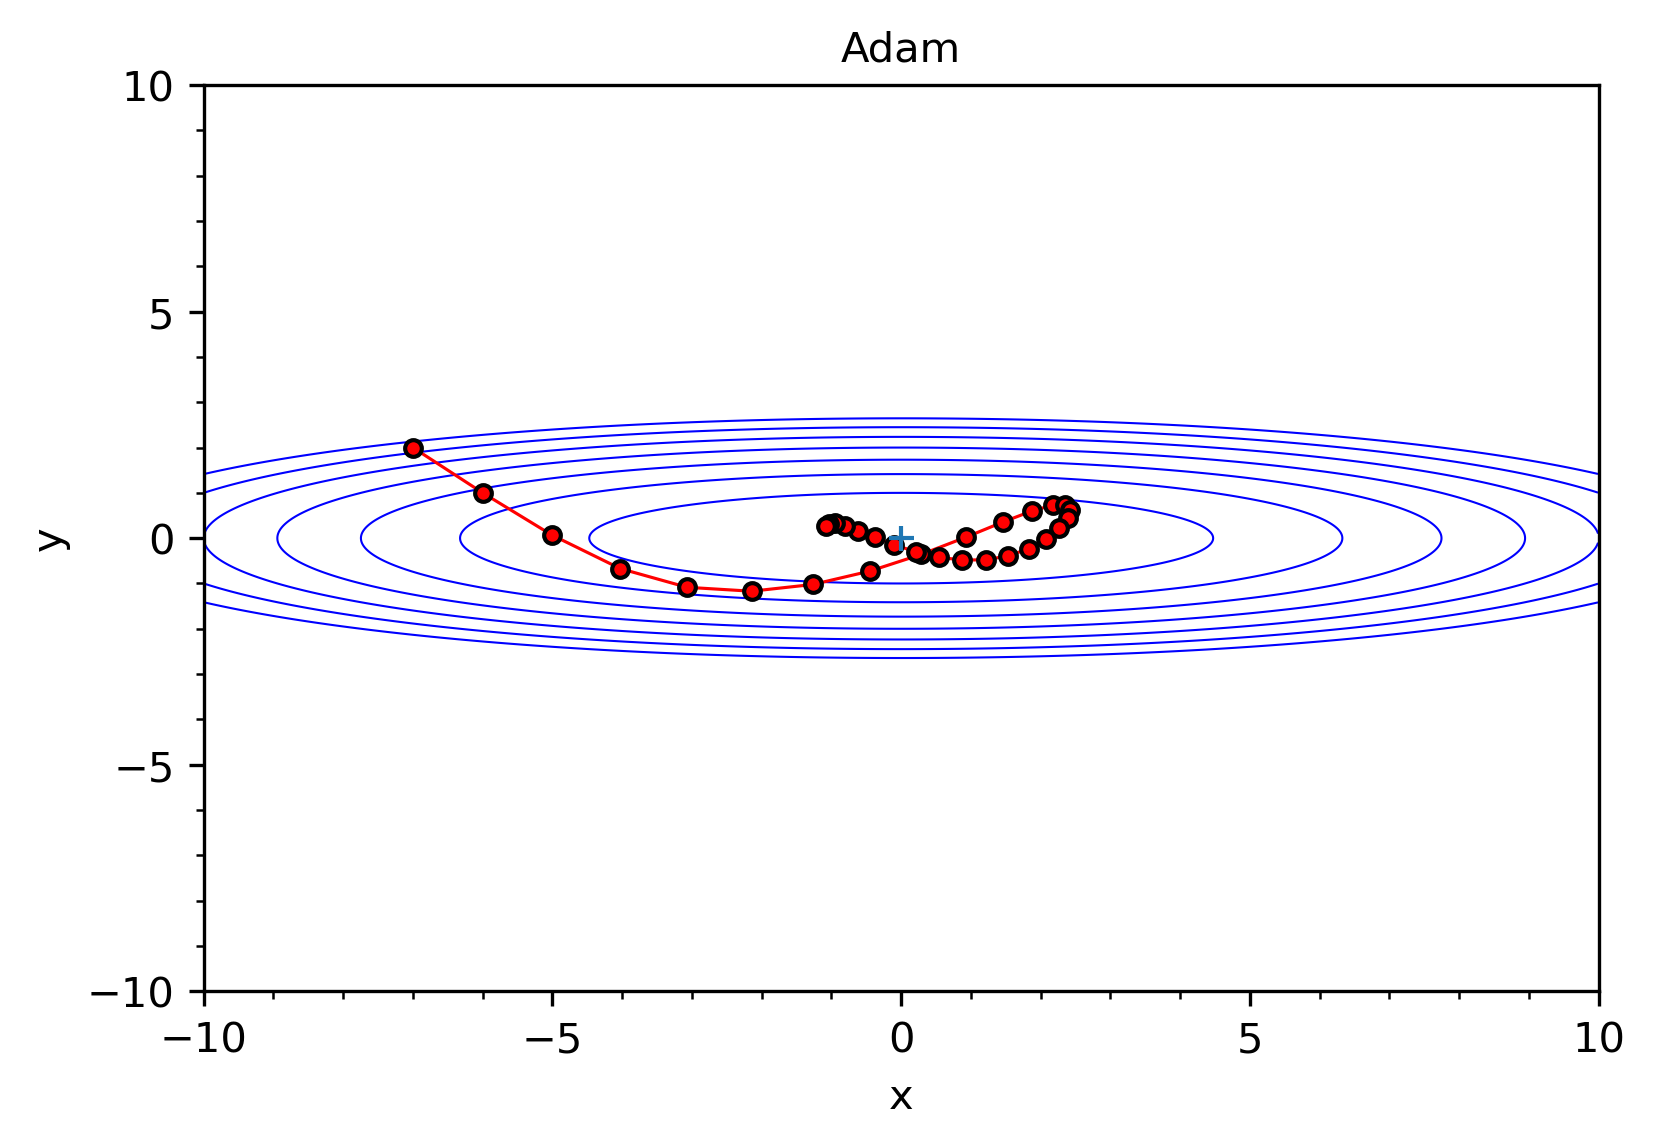

In [20]:
opt_path(Adam, 1)

## 最適化手法の比較

下は、MNISTデータセットを用いて最適化手法を比較する実験。<br>
各層100個のニューロン、5層のニューラルネットワークを対象にしている。活性化関数はReLU。

===========iteration:0===========
SGD:2.3907290640441374
Momentum:2.2896920234106783
AdaGrad:2.1689399271477754
Adam:2.274550027641488
===========iteration:100===========
SGD:1.6131463983058132
Momentum:0.5408222123254267
AdaGrad:0.2924044914834528
Adam:0.4312043894442521
===========iteration:200===========
SGD:0.7372258297814827
Momentum:0.2309620446163613
AdaGrad:0.07467241158620355
Adam:0.16983748647580793
===========iteration:300===========
SGD:0.5046622606321216
Momentum:0.2343197196826699
AdaGrad:0.0956244173693514
Adam:0.13393674743531264
===========iteration:400===========
SGD:0.3334528584740446
Momentum:0.16848595571133898
AdaGrad:0.06244903583382801
Adam:0.1787047105902042
===========iteration:500===========
SGD:0.34501725651274656
Momentum:0.17960467767212765
AdaGrad:0.05222490880808697
Adam:0.08667492971996026
===========iteration:600===========
SGD:0.3701702276189177
Momentum:0.13129397156117728
AdaGrad:0.08686227381205419
Adam:0.1152125394132682
===========iteration:700==

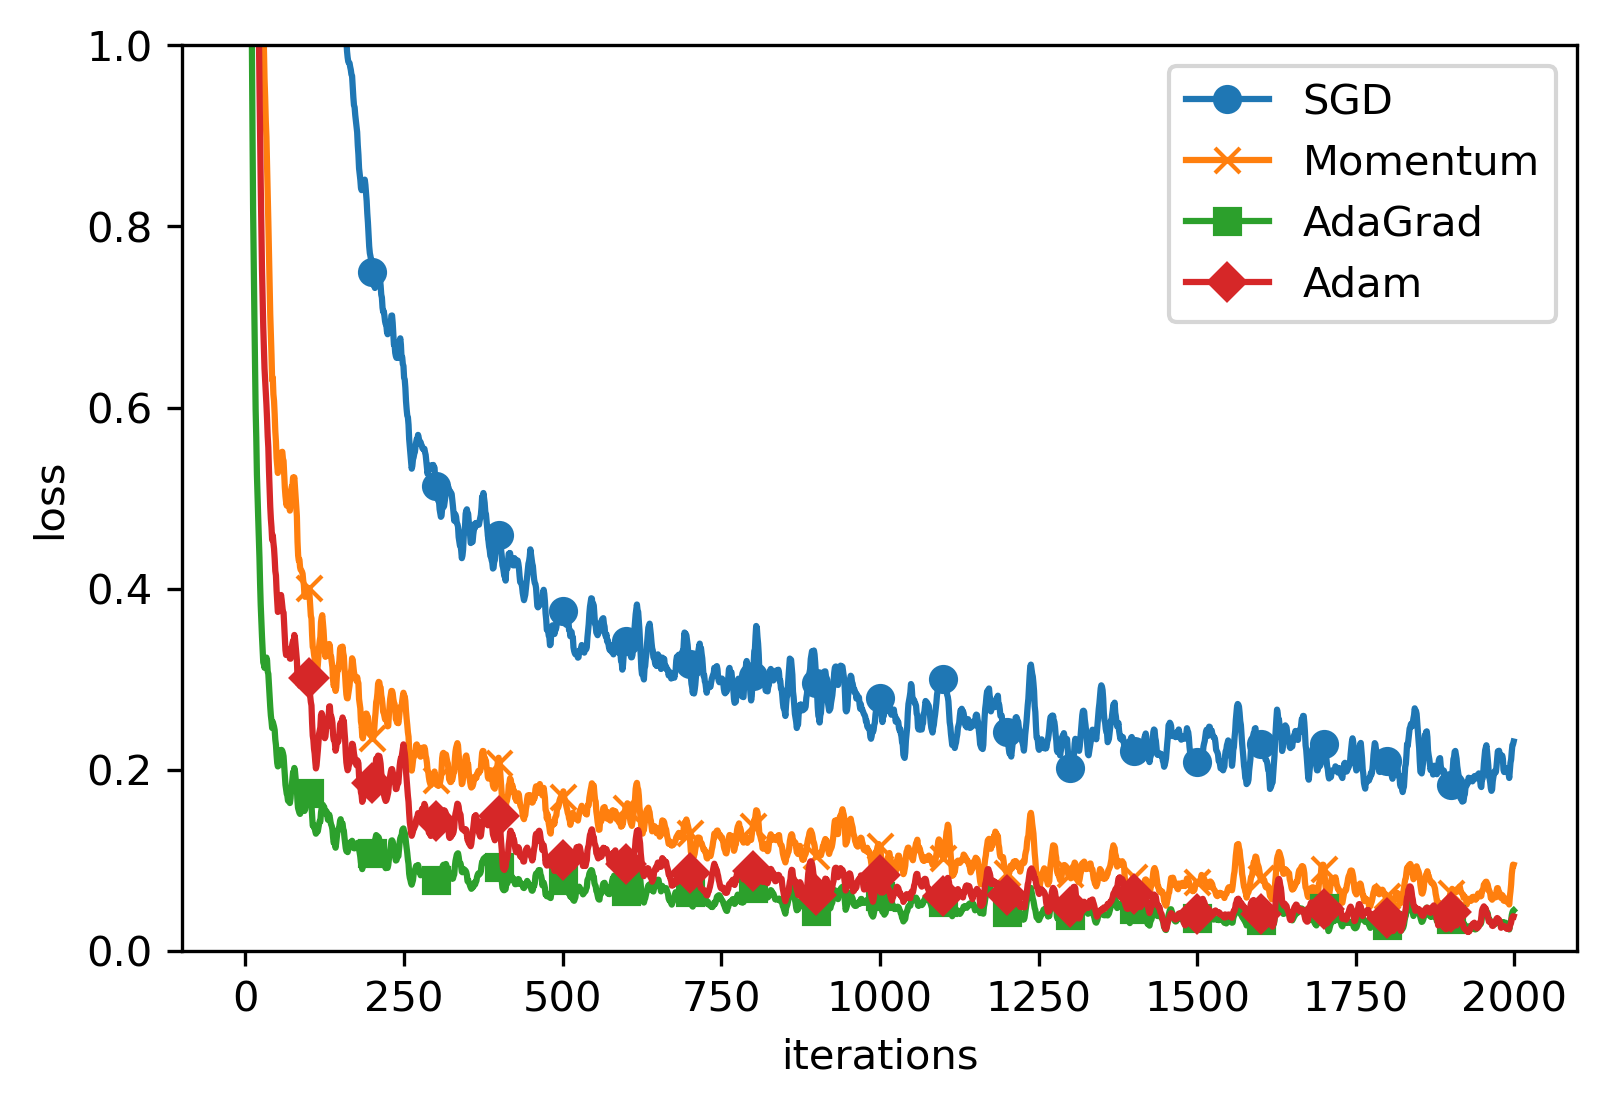

In [21]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
plt.figure(dpi=300)
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


- SGDよりも他の3つの手法の方が速く学習できている
- SGDよりも他の3つの手法の方が最終的な認識性能が高い
- AdaGradが少し速く学習できている

なお、学習係数などのハイパーパラメータや、ネットワークの構造によっては結果が変化する可能性がある。

SGD、Momentum、AdaGrad、Adamの4つの手法はそれぞれに特徴があり、全てにおいて優れた手法はない。<br>
今でもSGDは広く使われている。最近ではAdamも好んで使われる。

# 重みの初期値

逆伝播の値が0に近いと重みの更新量が小さくなり、学習が進まなくなってしまう（**勾配消失**）。<br>
重みの初期値が大きく影響するため、適切に初期値を設定する必要がある。<br><br>
**重みを均一な値に設定した場合**
>2層のニューラルネットワークを考える。
>1. 1層目と2層目の重みを0だと仮定する。
>2. 順伝播のとき、2層目のニューロンには全て同じ値が伝達される。
>3. 逆伝播のとき、2層目の重みは全て同じように更新される。
>4. 均一の値で更新されると、重みは重複した値を持つようになる。
><br>= 重みをたくさん持つ意味がなくなる。

重みの対照的な構造を崩すために、ランダムな初期値を与える必要がある。

## 中間層のアクティベーション分布

重みの初期値によって、中間層のアクティベーション（ここでは活性化関数の後の出力データをいう）の分布を、ヒストグラムで描画する実験を行う。（5層、各層100ニューロン）

初期値1：**標準偏差1の正規分布**<br><br>
初期値2：**標準偏差2の正規分布**<br><br>
初期値3：**Xavierの初期値**
>- 前層ノードの個数を $n$ として、標準偏差${\sqrt{\dfrac{1}{n}}}$の正規分布
>- 活性化関数が線形（中央付近が線形とみなすことができるsigmoidやtanhなど）のとき適する。

<br><br>
初期値4：**Heの初期値**
>- 前層ノードの個数を $n$ として、標準偏差${\sqrt{\dfrac{2}{n}}}$の正規分布
>- 活性化関数がReLUのとき適する。

=========== std=1 ===========
----- sigmoid -----


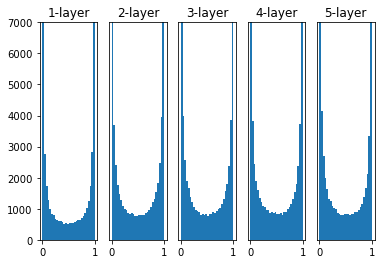

<ipython-input-22-346bb586b309>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


----- ReLU -----


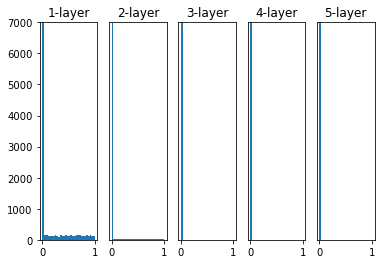

----- tanh -----


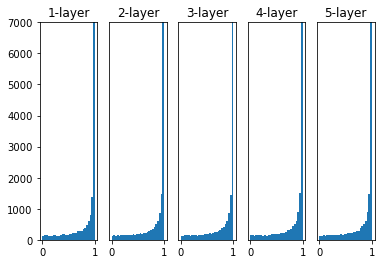

=========== std=0.01 ===========
----- sigmoid -----


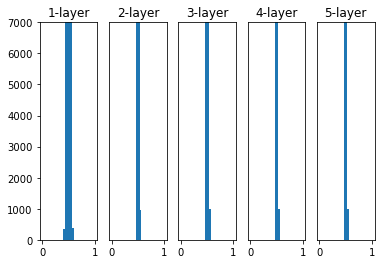

----- ReLU -----


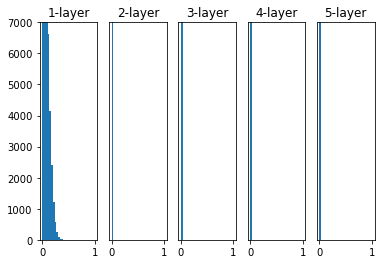

----- tanh -----


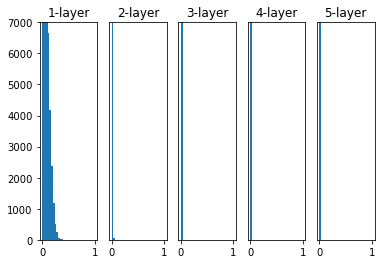

=========== Xavier ===========
----- sigmoid -----


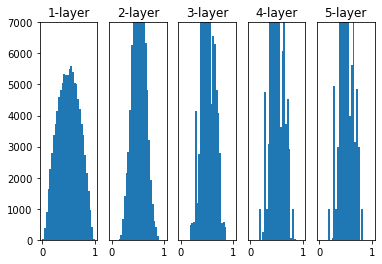

----- ReLU -----


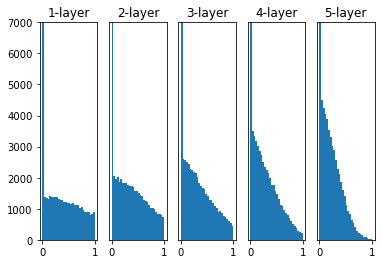

----- tanh -----


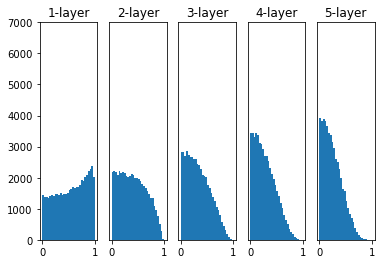

=========== He ===========
----- sigmoid -----


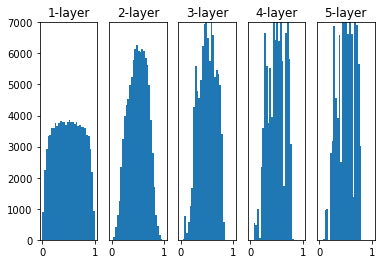

----- ReLU -----


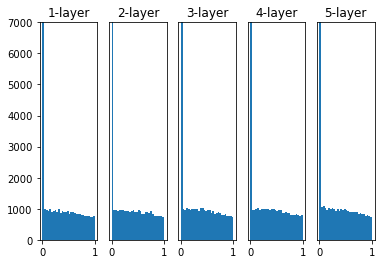

----- tanh -----


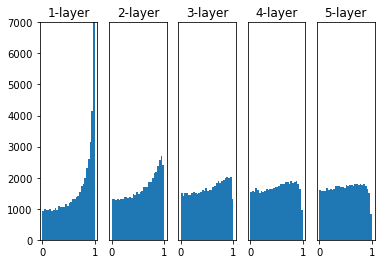

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のニューロン数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納
x = input_data

# 初期値の値をいろいろ変えて実験しよう！
w1 = np.random.randn(node_num, node_num) * 1
w2 = np.random.randn(node_num, node_num) * 0.01
w3 = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
w4 = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
list1 = [w1, w2, w3, w4]
name1 = ["std=1","std=0.01","Xavier","He"]

for i in range(4):    
    w = list1[i]
    print("=========== "+name1[i]+" ===========")

    for k in range(3):
        activations = {}

        x = input_data
        for j in range(hidden_layer_size):
            if j != 0:
                x = activations[j-1]
            z = np.dot(x, w)  
            
            # 活性化関数の種類も変えて実験しよう！
            a1 = sigmoid(z)
            a2 = ReLU(z)
            a3 = tanh(z)
            list2 = [a1, a2, a3]
            name2 = ["sigmoid","ReLU","tanh"]
            
            a = list2[k]
            activations[j] = a
            
        # ヒストグラムを描画
        print("----- "+name2[k]+" -----")
        for l, m in activations.items():
            plt.subplot(1, len(activations), l+1)
            plt.title(str(l+1) + "-layer")
            if l != 0: plt.yticks([], [])
            #plt.xlim(0.1, 1)
            plt.ylim(0, 7000)
            plt.hist(m.flatten(), 30, range=(0,1))
        plt.show()

- 勾配消失
> sigmoidでは、0または1に値が偏ると、逆伝播時には勾配の値がとても小さくなり、勾配消失が起きてしまう。<br><br>
>   - std=1の正規分布-sigmoid
>   - std=1の正規分布-tanh
>   - std=0.01の正規分布-ReLU
>   - Xavier-ReLU
   
<br>   
   
- 表現力の制限
> 複数ニューロンがほとんど同じ値を出力し、表現力の制限の点で問題がある。<br><br>
>   - std=0.01のsigmoid

<br>

- 効率的な学習
> いびつな形ではあるが、広がりを持った分布であり、効率的に学習ができると期待できる。
>   - Xavier-sigmoid<br><br>
>
> 層を深くしてもデータの広がりが均一なので、逆伝播の際も適切な値が流れると期待できる。
>   - He-ReLU

## MNISTデータセットでの比較

===========iteration:0===========
std=0.01:2.302504431496219
Xavier:2.2995424228453514
He:2.4143559326754405
===========iteration:100===========
std=0.01:2.3017377625692994
Xavier:2.2194184234165664
He:1.5096161672953734
===========iteration:200===========
std=0.01:2.302200039471879
Xavier:2.0936509237920493
He:0.8436750017889451
===========iteration:300===========
std=0.01:2.3009611825812457
Xavier:1.753421946189857
He:0.5719044780854539
===========iteration:400===========
std=0.01:2.3034209773517986
Xavier:1.2702373484244185
He:0.42338256156716075
===========iteration:500===========
std=0.01:2.2967141282859442
Xavier:0.825270901646268
He:0.3750425874589809
===========iteration:600===========
std=0.01:2.300121194302952
Xavier:0.6607786465336085
He:0.3982892984021362
===========iteration:700===========
std=0.01:2.3034699106200183
Xavier:0.5697059181380109
He:0.2919555565728676
===========iteration:800===========
std=0.01:2.305551462549324
Xavier:0.6038525588916148
He:0.4088462448421525

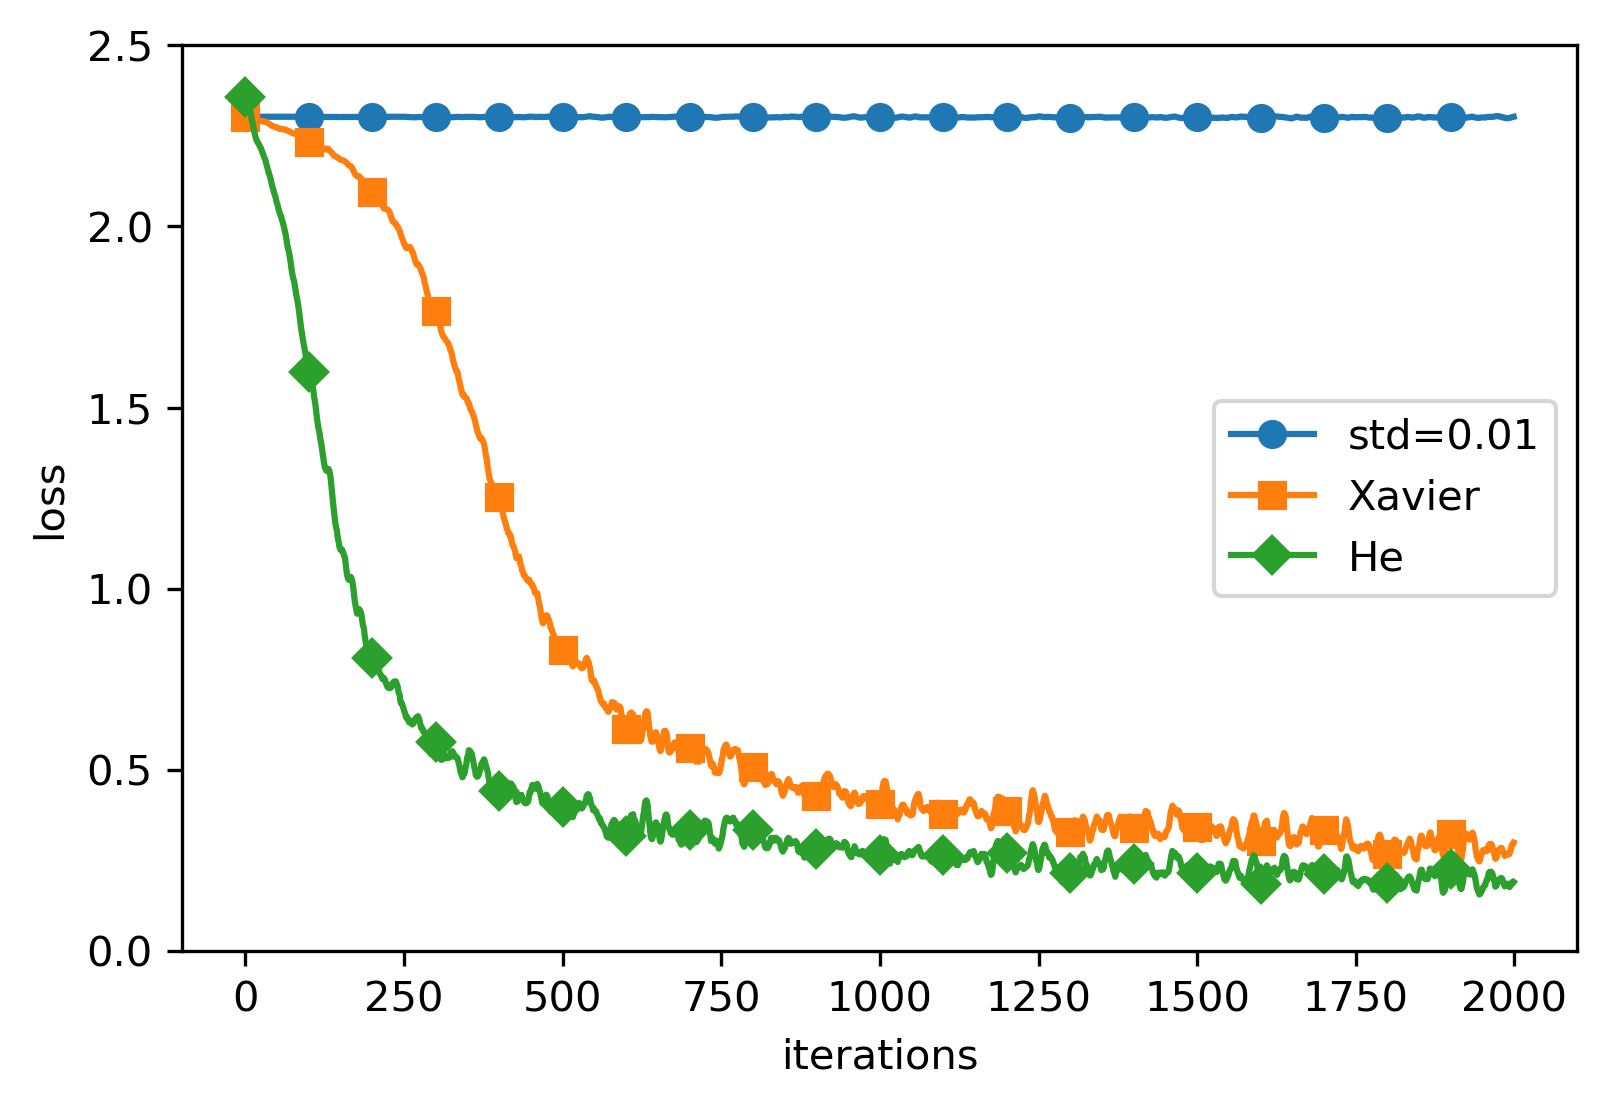

In [23]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
plt.figure(dpi=300)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

std=0.01のときは、順伝播で0に集中したデータが流れるため、ほとんど学習できていない。<br>
XavierとHeの初期値の場合は順調に学習できており、さらにHeの初期値の方が進みが速い。

# Batch Normalization

以上では、重みの初期値の調整によってアクティベーション分布の適度な広がりを保った。<br>
以下では、各層で適度な広がりを持つように、”強制的に”調整する。<br><br>
具体的には、学習の際のミニバッチを単位とし、ミニバッチごとに平均が0、分散が1になるように正規化する。<br>
以下の数式では、平均（ $\mu _B$ ）と分散（ $\sigma _{B}^{2}$ ）を求め、$\widehat{x}_{i}$ に正規化している。

$$\mu _B\leftarrow \dfrac{1}{m}\sum ^{m}_{i=1}x_{i}$$

$$\sigma _{B}^{2}\leftarrow \dfrac{1}{m}\sum ^{m}_{i=1}\left( x_{i}-\mu _{B}\right) ^{2}$$

$$\widehat{x}_{i}\leftarrow \dfrac{x_{i}-\mu _{B}}{\sqrt{\sigma _{B}^{2}+\varepsilon }}$$
**Batch Normalization**
>- 学習係数を大きくすることで、学習を速く進めることができる。
>- 初期値にそれほど依存しない。
>- 過学習を抑制する。

この処理を、活性化関数の前に挿入することで、データの分布の偏りを減らすことができる。<br>
またBatch Normレイヤでは、正規化されたデータに対し、次のように固有のスケールとシフトで変換を行う。

$$y_i \leftarrow \gamma\widehat{x}_i+\beta$$

$\gamma$ と $\beta$ はパラメータで、$\gamma =1$、$\beta = 0$ から始まり、学習によって適した値に調整されていく。

============== 1/16 ==============


/Users/sasakishunsuke1/Documents/PythonModel/07_Neural-Network-Techniques/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/sasakishunsuke1/Documents/PythonModel/07_Neural-Network-Techniques/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/sasakishunsuke1/Documents/PythonModel/07_Neural-Network-Techniques/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


============== 2/16 ==============


No handles with labels found to put in legend.


============== 3/16 ==============


No handles with labels found to put in legend.


============== 4/16 ==============


No handles with labels found to put in legend.


============== 5/16 ==============


No handles with labels found to put in legend.


============== 6/16 ==============


No handles with labels found to put in legend.


============== 7/16 ==============


No handles with labels found to put in legend.


============== 8/16 ==============


No handles with labels found to put in legend.


============== 9/16 ==============


No handles with labels found to put in legend.


============== 10/16 ==============


No handles with labels found to put in legend.


============== 11/16 ==============


No handles with labels found to put in legend.


============== 12/16 ==============


No handles with labels found to put in legend.


============== 13/16 ==============


No handles with labels found to put in legend.


============== 14/16 ==============


No handles with labels found to put in legend.


============== 15/16 ==============


No handles with labels found to put in legend.


============== 16/16 ==============


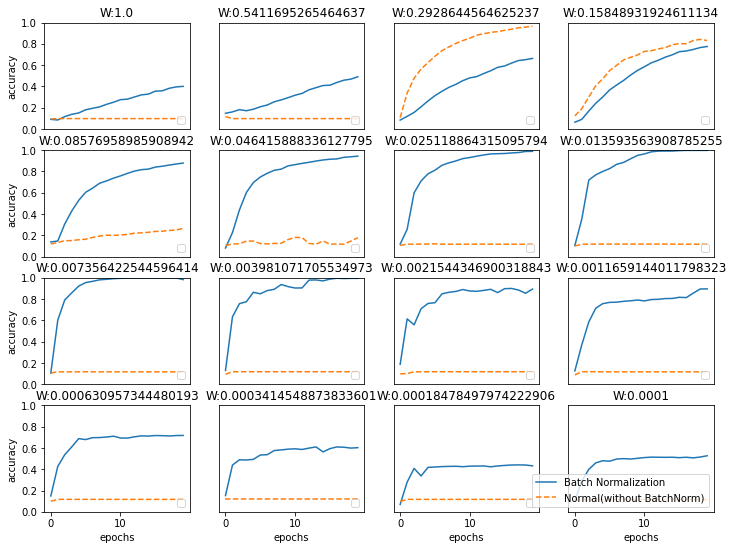

In [24]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
plt.figure(figsize=(12,9))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

重みの初期値の標準偏差を様々に変えて実験したもの。<br>
- ほとんど全ての場合でBatch Normを使用した方が学習の進みが速い。
- Batch Normを用いないと、学習が進まないこともある

Batch Normを使うと、初期値にロバスト（初期値にそれほど依存しない）になる。

# 正則化

## 過学習とは

機械学習では、訓練データに適応しすぎて、汎化性能が高くならない**過学習**（overfitting）が問題になる。<br>
主な原因は以下。
- パラメータを大量に持ち、表現力が高いモデルであること
- 訓練データが少ない

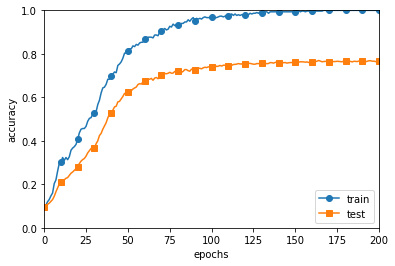

In [25]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0, 200)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

過学習を起きた上の例では、<br>
- 訓練データの認識精度は、100エポックを過ぎたあたりからほぼ100％（過剰適合）。
- テストデータ認識精度は、100％とは大きな隔たりがあり、汎用的なデータへの対応ができていない。

## Weight decay

Weight decay（荷重減衰）という手法は、大きな重みにペナルティを課して、過学習を抑えるもの。<br><br>
L1ノルム（重みの絶対値の和）、L2ノルム（重みの二乗和）、L∞ノルム（重みの絶対値の中の最大値）などの正規化項を損失関数に加算し、重みを大きくなることを防ぐ。<br><br>
重みの勾配を求める計算では、誤差逆伝播法による結果に、正則化項の微分を加算する。

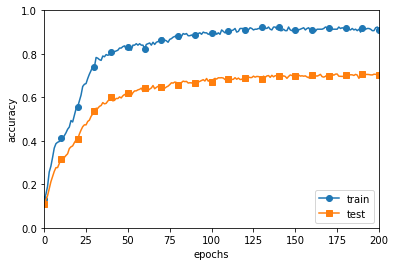

In [26]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=0.1)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0, 200)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


上では、一般的に多く用いられるL2ノルムを加えて実装したもの。<br>
訓練データの精度が100％に到達せず、テストデータとの隔たりも小さくなっていて、過学習が抑制された。

## Dropout

Dropoutは、ニューロンをランダムに消去しながら学習する方法。<br>
推論時は、各ニューロンの出力に対して消去した割合を乗算する。<br><br>
ニューラルネットワークが複雑になると、Weight decayのみでの対応が困難な場合などでよく用いられる。

In [27]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_raio
        self.mask = None
        
    def forward(self, x, train_fig=True):
        if train_fig:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

ReLUと同様、順伝播で信号を通さなかったニューロンは、逆伝播ではそこで信号がストップする。

=============== Final Test Accuracy ===============
test acc:0.7632


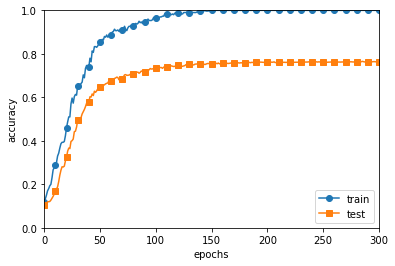

=============== Final Test Accuracy ===============
test acc:0.5435


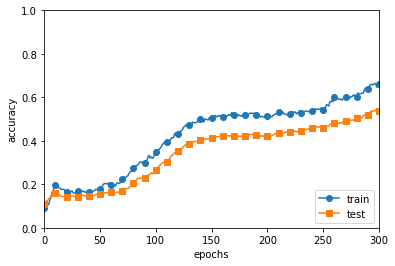

In [28]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer2 import Trainer2

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]


# Dropuout無し===============

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=False)
trainer = Trainer2(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0, 300)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


# Dropuout有り===============

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=True, dropout_ration=0.2)
trainer = Trainer2(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0, 300)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データの精度が100％に到達せず、テストデータとの隔たりも小さくなっていて、過学習が抑制された。<br>
Dropoutを用いれば、表現力の高いネットワークでも、過学習を抑制することができる。

<br><br>
また、複数モデルを個別に学習させ、推論時には複数出力の平均をとる**アンサンブル学習**では、認識精度が数％向上することが分かっている。<br><br>
Dropoutは、学習時にニューロンをランダムに削除しているため、毎回異なるモデルを学習させていると解釈でき、推論時は削除割合を乗算しているため、モデル平均をとっていることになる。<br><br>
そのため、Dropoutでは、アンサンブル学習を擬似的に一つのニューラルネットワークで実現していると考えることができる。

# ハイパーパラメータ

**ハイパーパラメータの最適化1**
>1. 大まかにハイパーパラメータの範囲を設定する。
>2. 設定した範囲の中からランダムに選び出す（サンプリング）。
>3. サンプリングした値で認識精度の評価。
>4. 2〜3を繰り返し、精度の結果の観察。
>5. 4をもとに、ハイパーパラメータの良い値の範囲を狭めていく。
>6. 1〜5を繰り返し、ハイパーパラメータの値を徐々に限定していく。

<br><br>
**ハイパーパラメータの最適化2_ベイズ最適化**
>1. する。

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.81) | lr:0.00872869022290346, weight decay:2.345082535122124e-06
Best-2(val acc:0.8) | lr:0.008639413468925055, weight decay:4.729471741635886e-07
Best-3(val acc:0.77) | lr:0.00806614297761809, weight decay:3.0513554276013346e-05
Best-4(val acc:0.72) | lr:0.006289804578111046, weight decay:1.5648279213946135e-08
Best-5(val acc:0.72) | lr:0.005409177788968514, weight decay:8.803463584247022e-06
Best-6(val acc:0.71) | lr:0.007885076270269062, weight decay:4.940121083087799e-08
Best-7(val acc:0.69) | lr:0.007085734439107189, weight decay:2.4339244739988423e-08
Best-8(val acc:0.67) | lr:0.005865435869252743, weight decay:2.8855954313208205e-07
Best-9(val acc:0.65) | lr:0.00523400374532991, weight decay:2.8737494880812124e-05
Best-10(val acc:0.63) | lr:0.004494227773288045, weight decay:1.688641340253268e-08
Best-11(val acc:0.59) | lr:0.0034487366920796405, weight decay:2.6473276315698477e-08
Best-12(val acc:0.5) |

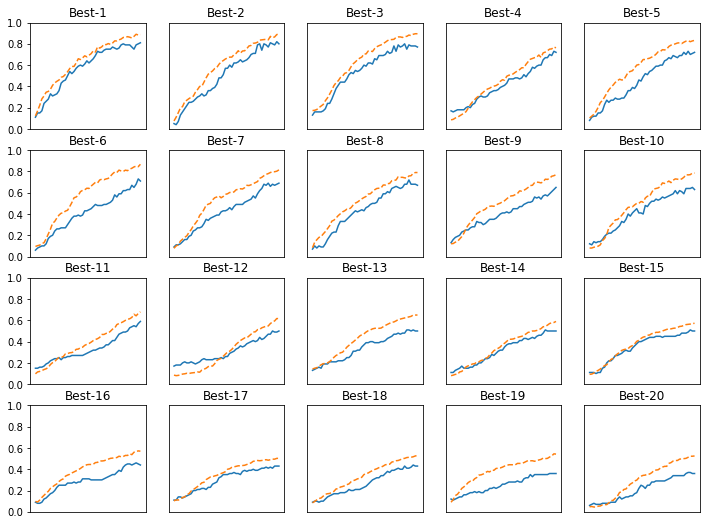

In [29]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer2 import Trainer2

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer2(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    #print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(12,9))
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

Best-5くらいまでは順調に学習が進んでいる。<br>
うまく学習できているのは、学習係数が$0.001$から$0.01$、Weight decayパラメータが$10^{-8}$から$10^{-5}$くらい。